In [2]:
from pycoingecko import CoinGeckoAPI
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

cg = CoinGeckoAPI()

cg.get_price(ids=['bitcoin', 'litecoin', 'ethereum'], vs_currencies=['usd',"eur"])

{'bitcoin': {'usd': 23951, 'eur': 23265},
 'ethereum': {'usd': 1894.67, 'eur': 1840.43},
 'litecoin': {'usd': 61.87, 'eur': 60.1}}

In [3]:
list_of_symbols = ['btc'] #, 'eth', 'ltc']

response = requests.get("https://api.coingecko.com/api/v3/coins/list").json()

data = pd.DataFrame(response).set_index('symbol').sort_index().loc[list_of_symbols]

data.head()

,id,name
symbol,,
btc,bitcoin,Bitcoin


In [4]:
params = {'ids':','.join(data['id']),
          'vs_currencies':'usd',
          'include_market_cap':'true',
          'include_24hr_vol':'true',
          'include_24hr_change':'true',
          'include_last_updated_at':'true'
          }

response = requests.get("https://api.coingecko.com/api/v3/simple/price", params=params).json()

In [5]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df = pd.DataFrame(response).round(decimals=0).transpose()

df

,last_updated_at,usd,usd_24h_change,usd_24h_vol,usd_market_cap
bitcoin,1660296014,23946,-2,28720806936,457834958963


In [6]:
pd.to_datetime(df['last_updated_at']).apply(lambda x: x.date())

bitcoin    1970-01-01
Name: last_updated_at, dtype: object

In [7]:
params = {'ids':','.join(data['id']),
          'vs_currencies':'usd',
          'date':'14-01-2021',
          'interval':'daily'
          }

response = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/history/", params=params).json()

df = pd.DataFrame(response)

df

,id,symbol,name,localization,image,market_data,community_data,developer_data,public_interest_stats
en,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
de,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
es,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
fr,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
it,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
pl,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
ro,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
hu,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
nl,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
pt,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN


In [8]:
params = {'ids':','.join(data['id']),
          'vs_currency':'usd',
          'days':'max',
          'interval':'daily'
          }

response = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/", params=params).json()

df = pd.DataFrame(response['prices'])

df

,0,1
0,1367107200000,135
1,1367193600000,142
2,1367280000000,135
3,1367366400000,117
4,1367452800000,103
...,...,...
3387,1659916800000,23198
3388,1660003200000,23824
3389,1660089600000,23204
3390,1660176000000,23949


In [9]:
from datetime import datetime

df['ts'] = [datetime.fromtimestamp(int(str(x)[:-3])) for x in df[0]]

df = df.set_index('ts')

df[1]

ts
2013-04-28 02:00:00     135
2013-04-29 02:00:00     142
2013-04-30 02:00:00     135
2013-05-01 02:00:00     117
2013-05-02 02:00:00     103
                       ... 
2022-08-08 02:00:00   23198
2022-08-09 02:00:00   23824
2022-08-10 02:00:00   23204
2022-08-11 02:00:00   23949
2022-08-12 01:34:07   23955
Name: 1, Length: 3392, dtype: float64

<AxesSubplot:xlabel='ts'>

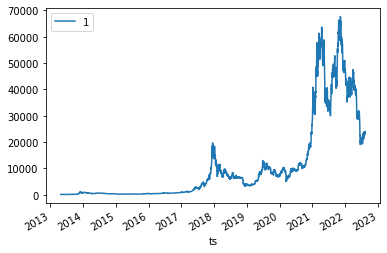

In [10]:
df[[1]].plot()